# How to check the normal or gaussian distribution of our data in Python?

In [3]:
#import libararies
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sc
import matplotlib.pyplot as plt

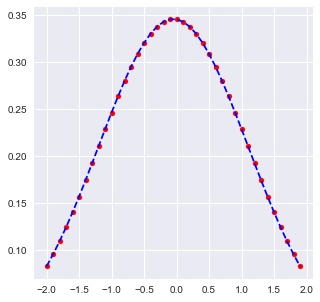

In [4]:
#how to draw perfect normal distribution 
def pdf(x):
    mean = np.mean(x)
    std = np.std(x)
    y_out = 1/(std*np.sqrt(2* np.pi))* np.exp(-(x- mean)**2/(2* std**2))
    return y_out

#to generate an array of x
x= np.arange (-2,2,0.1)
y=pdf(x)
#plotting the normal curve/ bell curve / guassian distribution
plt.style.use('seaborn')
plt.figure(figsize=(5,5))
plt.plot(x,y,color ='blue',linestyle ='dashed')
#adding scatter plot on line
plt.scatter(x,y, marker='o',s=25,color='red')

# Normal disrributionand its test 
1. import dataset
2. subsetting a dataset
3. visual test for normal distribution
   1. histogram
   2. qq-norm test
4. statistical test
   1. Shapiro-Wilk Test
   2. D’Agostino’s K^2 Test
   3. Anderson-Darling Test
p <= alpha: reject H0, not normal.\ p > alpha: fail to reject H0, normal.

In [19]:
#import data
kashti = pd.read_csv('ml_data_salary.csv')
kashti.head(2)


,age,distance,YearsExperience,Salary
0,31.1,77.75,1.1,39343
1,31.3,78.25,1.3,46205


In [26]:
#subsetting data
kashti= kashti[['YearsExperience','Salary']]
kashti.head(2)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205


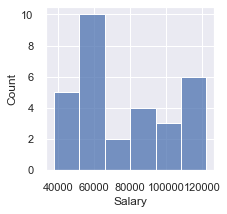

In [18]:
#histogram test
sns.histplot(kashti['Salary'])

#setting for small fig size
sns.set(rc = {'figure.figsize':(3,3)})

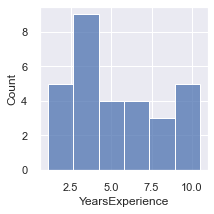

In [23]:
#histogram test
sns.histplot(kashti['YearsExperience'])

#setting for small fig size
sns.set(rc = {'figure.figsize':(3,3)})

C:\Users\Azka\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


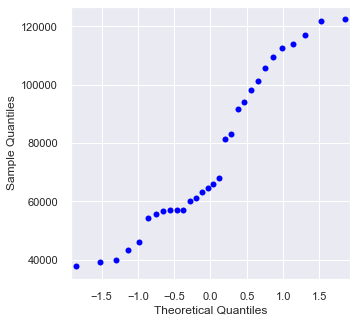

In [31]:
#qqplot
from statsmodels.graphics.gofplots import qqplot

#qq norm plot
qqplot(kashti['Salary'])

#setting for small fig size
sns.set(rc = {'figure.figsize':(5,5)})

C:\Users\Azka\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


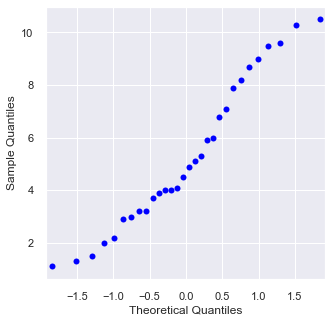

In [30]:
#qqplot
from statsmodels.graphics.gofplots import qqplot

#qq norm plot
qqplot(kashti['YearsExperience'])

#setting for small fig size
sns.set(rc = {'figure.figsize':(5,5)})

## 1. Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.

The shapiro() SciPy function will calculate the Shapiro-Wilk on a given dataset. The function returns both the W-statistic calculated by the test and the p-value.

**Assumptions**

Observations in each sample are independent and identically distributed.
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution

In [32]:
#shapiro wilk test

# import libarary
from scipy.stats import shapiro

stat , p = shapiro(kashti['Salary'])
print('stat=%.3f,p=%.3f'% (stat,p))

# make a conditional argument for further case
if p > 0.05:
  print('Probably gaussian or normal distribution')
else:
    print('Probably not gaussian or normal distributions')


stat=0.910,p=0.015
Probably not gaussian or normal distributions


In [33]:
#shapiro wilk test

# import libarary
from scipy.stats import shapiro

stat , p = shapiro(kashti['YearsExperience'])

print('stat=%.3f,p=%.3f'% (stat,p))

# make a conditional argument for further case
if p > 0.05:
  print('Probably gaussian or normal distribution')
else:
    print('Probably not gaussian or normal distributions')

stat=0.942,p=0.103
Probably gaussian or normal distribution


## 2. D’Agostino’s K^2 Test
The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.
The D’Agostino’s K^2 test is available via the normaltest() SciPy function and returns the test statistic and the p-value. Assumptions

Observations in each sample are independent and identically distributed.
**Interpretation**

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [34]:
#D'Agastino k2 test

# import libarary
from scipy.stats import normaltest

stat , p = normaltest(kashti['Salary'])

print('stat=%.3f,p=%.3f'% (stat,p))

# make a conditional argument for further case
if p > 0.05:
  print('Probably gaussian or normal distribution')
else:
    print('Probably not gaussian or normal distributions')

stat=8.033,p=0.018
Probably not gaussian or normal distributions


In [35]:
#D'Agastino k2 test

# import libarary
from scipy.stats import normaltest

stat , p = normaltest(kashti['YearsExperience'])

print('stat=%.3f,p=%.3f'% (stat,p))

# make a conditional argument for further case
if p > 0.05:
  print('Probably gaussian or normal distribution')
else:
    print('Probably not gaussian or normal distributions')

stat=3.808,p=0.149
Probably gaussian or normal distribution


## 3. Anderson-Darling Test
A statistical test that can be used to evaluate whether a data sample comes from one of among many known data samples, named for Theodore Anderson and Donald Darling.

It can be used to check whether a data sample is normal. The test is a modified version of a more sophisticated nonparametric goodness-of-fit statistical test called the Kolmogorov-Smirnov test.

A feature of the Anderson-Darling test is that it returns a list of critical values rather than a single p-value. This can provide the basis for a more thorough interpretation of the result.

The anderson() SciPy function implements the Anderson-Darling test. It takes as parameters the data sample and the name of the distribution to test it against. By default, the test will check against the Gaussian distribution (dist=’norm’).

**Assumptions**

Observations in each sample are independent and identically distributed.
Interpretation

H0: the sample has a Gaussian distribution.
H1: the sample does not have a Gaussian distribution.

In [36]:
#andersons darling test

#import libarary
from scipy.stats import anderson

#select a column to check the normal distribution
result = anderson(kashti['Salary'])
print ('stat= %.3f' % (result.statistic))
for i in range (len(result.critical_values)):
    sl,cv =result.significance_level[i], result.critical_values[i]
    if result.statistic< cv:
        print('Probably gaussian/normal distribution at the %.1f%% level' %(sl))
    else:
        print('Probably not gaussian/normal distribution at the %.1f%% level' %(sl))

stat= 1.002
Probably not gaussian/normal distribution at the 15.0% level
Probably not gaussian/normal distribution at the 10.0% level
Probably not gaussian/normal distribution at the 5.0% level
Probably not gaussian/normal distribution at the 2.5% level
Probably not gaussian/normal distribution at the 1.0% level


In [38]:
#andersons darling test

#import libarary
from scipy.stats import anderson

#select a column to check the normal distribution
result = anderson(kashti['YearsExperience'])
print ('stat= %.3f' % (result.statistic))
for i in range (len(result.critical_values)):
    sl,cv =result.significance_level[i], result.critical_values[i]
    if result.statistic< cv:
        print('Probably gaussian/normal distribution at the %.1f%% level' %(sl))
    else:
        print('Probably not gaussian/normal distribution at the %.1f%% level' %(sl))

stat= 0.558
Probably not gaussian/normal distribution at the 15.0% level
Probably gaussian/normal distribution at the 10.0% level
Probably gaussian/normal distribution at the 5.0% level
Probably gaussian/normal distribution at the 2.5% level
Probably gaussian/normal distribution at the 1.0% level
